## Object Detection in Images using Opencv 

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the COCO class names
with open('./input/object_detection_classes_coco.txt', 'r') as f:
    class_names = f.read().split('\n')

In [11]:
# get a different color array for each of the classes
COLORS = np.random.uniform(0, 255, size=(len(class_names), 3))

# load the DNN model
model = cv2.dnn.readNet(model='./input/frozen_inference_graph.pb',
                        config='./input/ssd_mobilenet_v2_coco_2018_03_29.pbtxt.txt', 
                        framework='TensorFlow')

In [12]:
# read the image from disk
image = cv2.imread('./input/image_2.jpg')
image_height, image_width, _ = image.shape
# create blob from image
blob = cv2.dnn.blobFromImage(image=image, size=(300, 300), mean=(104, 117, 123), 
                             swapRB=True)
# create blob from image
model.setInput(blob)
# forward pass through the model to carry out the detection
output = model.forward()

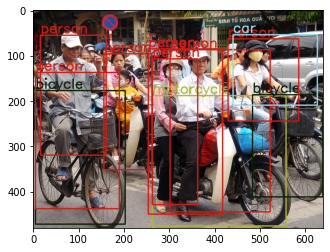

In [16]:
# loop over each of the detection
for detection in output[0, 0, :, :]:
    # extract the confidence of the detection
    confidence = detection[2]
    # draw bounding boxes only if the detection confidence is above...
    # ... a certain threshold, else skip
    if confidence > .4:
        # get the class id
        class_id = detection[1]
        # map the class id to the class
        class_name = class_names[int(class_id)-1]
        color = COLORS[int(class_id)]
        # get the bounding box coordinates
        box_x = detection[3] * image_width
        box_y = detection[4] * image_height
        # get the bounding box width and height
        box_width = detection[5] * image_width
        box_height = detection[6] * image_height
        # draw a rectangle around each detected object
        cv2.rectangle(image, (int(box_x), int(box_y)), (int(box_width), int(box_height)), color, thickness=2)
        # put the FPS text on top of the frame
        cv2.putText(image, class_name, (int(box_x), int(box_y - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
                
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()